# 1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn import preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from textblob import TextBlob
from collections import defaultdict
from wordcloud.wordcloud import WordCloud,STOPWORDS
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the Dataset

In [2]:
data = pd.read_csv('reviews.csv')
data

Text
0     A Midrange phone from oneplus. why I choose th...
1     Bought in big billion day sale but towards the...
2     I was searching a smartphone in 25-30k segment...
3     *Battery life is decent, if you're a heavy use...
4     After the six months of use i would like to sa...
...                                                 ...
3705                                                NaN
3706              Camera quality and performance awsome
3707  Mobile hangs a lot it gets hangs atleast for 3...
3708                                      Amazing Phone
3709  Fast charging it tooks maximum 20 minutes for ...

[3710 rows x 1 columns]

In [3]:
print("The shape of Data is (row,column) : "+str(data.shape))

The shape of Data is (row,column) : (3710, 1)


# 3. EDA : Exploratory Data Analysis

## 3.1. Handling Nan Values

In [4]:
# Handling Nan Values
data.isna().sum()

Text    184
dtype: int64

In [5]:
data = data[data.Text.notnull()]
print(data)

                                                   Text
0     A Midrange phone from oneplus. why I choose th...
1     Bought in big billion day sale but towards the...
2     I was searching a smartphone in 25-30k segment...
3     *Battery life is decent, if you're a heavy use...
4     After the six months of use i would like to sa...
...                                                 ...
3704                 At this price..One Plus.. Go 4 it.
3706              Camera quality and performance awsome
3707  Mobile hangs a lot it gets hangs atleast for 3...
3708                                      Amazing Phone
3709  Fast charging it tooks maximum 20 minutes for ...

[3526 rows x 1 columns]


In [6]:
print("The shape of Data is (row,column) : "+str(data.shape))

The shape of Data is (row,column) : (3526, 1)


In [7]:
# Handling Nan Values
data.isna().sum()

Text    0
dtype: int64

## 3.2. Polarity of Text

In [8]:
data['Polarity'] = data['Text'].map(lambda text: TextBlob(text).sentiment.polarity)
data

Text  Polarity
0     A Midrange phone from oneplus. why I choose th...  0.289286
1     Bought in big billion day sale but towards the...  0.136111
2     I was searching a smartphone in 25-30k segment...  0.556250
3     *Battery life is decent, if you're a heavy use...  0.319231
4     After the six months of use i would like to sa...  0.175833
...                                                 ...       ...
3704                 At this price..One Plus.. Go 4 it.  0.000000
3706              Camera quality and performance awsome  0.000000
3707  Mobile hangs a lot it gets hangs atleast for 3... -0.100000
3708                                      Amazing Phone  0.600000
3709  Fast charging it tooks maximum 20 minutes for ...  0.200000

[3526 rows x 2 columns]

In [9]:
def polarity(row):
    '''This function returns sentiment value based on the overall ratings from the users'''
    if row['Polarity'] > 0.0:
        val = 'Positive'
    elif row['Polarity'] < 0.0:
        val = 'Negative'
    elif row['Polarity'] == 0.0:
        val = 'Neutral'
    else:
        val = -1
    return val

In [10]:
# Applying the function in our new column
data['Sentiment'] = data.apply(polarity,axis=1)
data

Text  Polarity Sentiment
0     A Midrange phone from oneplus. why I choose th...  0.289286  Positive
1     Bought in big billion day sale but towards the...  0.136111  Positive
2     I was searching a smartphone in 25-30k segment...  0.556250  Positive
3     *Battery life is decent, if you're a heavy use...  0.319231  Positive
4     After the six months of use i would like to sa...  0.175833  Positive
...                                                 ...       ...       ...
3704                 At this price..One Plus.. Go 4 it.  0.000000   Neutral
3706              Camera quality and performance awsome  0.000000   Neutral
3707  Mobile hangs a lot it gets hangs atleast for 3... -0.100000  Negative
3708                                      Amazing Phone  0.600000  Positive
3709  Fast charging it tooks maximum 20 minutes for ...  0.200000  Positive

[3526 rows x 3 columns]

In [11]:
data.drop(['Polarity'], axis=1,inplace=True)
data

Text Sentiment
0     A Midrange phone from oneplus. why I choose th...  Positive
1     Bought in big billion day sale but towards the...  Positive
2     I was searching a smartphone in 25-30k segment...  Positive
3     *Battery life is decent, if you're a heavy use...  Positive
4     After the six months of use i would like to sa...  Positive
...                                                 ...       ...
3704                 At this price..One Plus.. Go 4 it.   Neutral
3706              Camera quality and performance awsome   Neutral
3707  Mobile hangs a lot it gets hangs atleast for 3...  Negative
3708                                      Amazing Phone  Positive
3709  Fast charging it tooks maximum 20 minutes for ...  Positive

[3526 rows x 2 columns]

In [12]:
data['Sentiment'].value_counts()

Positive    2612
Neutral      582
Negative     332
Name: Sentiment, dtype: int64

In [13]:
df = pd.DataFrame(data)
df.to_csv('amazon.csv', index=False)

### Again Reading New CSV

In [14]:
df = pd.read_csv('amazon.csv')
df

Text Sentiment
0     A Midrange phone from oneplus. why I choose th...  Positive
1     Bought in big billion day sale but towards the...  Positive
2     I was searching a smartphone in 25-30k segment...  Positive
3     *Battery life is decent, if you're a heavy use...  Positive
4     After the six months of use i would like to sa...  Positive
...                                                 ...       ...
3521                 At this price..One Plus.. Go 4 it.   Neutral
3522              Camera quality and performance awsome   Neutral
3523  Mobile hangs a lot it gets hangs atleast for 3...  Negative
3524                                      Amazing Phone  Positive
3525  Fast charging it tooks maximum 20 minutes for ...  Positive

[3526 rows x 2 columns]

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

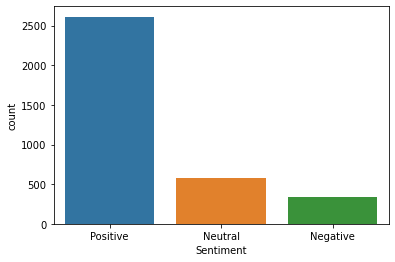

In [15]:
# Plot
sns.countplot(x='Sentiment',data=df)

## 3.3. Cleaning the Text

In [16]:
df['Clean_text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_stopwords)
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_special_characters)

In [17]:
df

Text Sentiment  \
0     A Midrange phone from oneplus. why I choose th...  Positive   
1     Bought in big billion day sale but towards the...  Positive   
2     I was searching a smartphone in 25-30k segment...  Positive   
3     *Battery life is decent, if you're a heavy use...  Positive   
4     After the six months of use i would like to sa...  Positive   
...                                                 ...       ...   
3521                 At this price..One Plus.. Go 4 it.   Neutral   
3522              Camera quality and performance awsome   Neutral   
3523  Mobile hangs a lot it gets hangs atleast for 3...  Negative   
3524                                      Amazing Phone  Positive   
3525  Fast charging it tooks maximum 20 minutes for ...  Positive   

                                             Clean_text  
0     Midrange phone oneplus choose phone brand valu...  
1     Bought big billion day sale end experience Ama...  
2     searching smartphone 2530k segment checked lot...  
3     Battery life decent heavy user backup 1215hrs ...  
4     months use like good phone price range 6 month...  
...                                                 ...  
3521                                 priceOne Plus 4 it  
3522                  Camera quality performance awsome  
3523        Mobile hangs lot gets hangs atleast 30 sec   
3524                                      Amazing Phone  
3525    Fast charging tooks maximum 20 minutes charging  

[3526 rows x 3 columns]

## 3.4. N-gram Analysis

### 3.4.1. Monogram Analysis: Here we will plot most frequent one word in reveiws based on sentiments.

In [18]:
# Filtering data
review_pos = df[df['Sentiment']=='Positive'].dropna()
review_neu = df[df['Sentiment']=='Neutral'].dropna()
review_neg = df[df['Sentiment']=='Negative'].dropna()

In [19]:
# Custom function for ngram generation
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [20]:
# Custom function for horizontal bar chart 
def horizontal_bar_chart(df,color):
    trace = go.Bar(
        y = df['Word'].values[::-1],
        x = df['Word Count'].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker=dict(color=color,),
    )
    return trace

In [21]:
# Get the bar chart from positive reviews
freq_dict = defaultdict(int)
for sent in review_pos['Text']:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
        
fd_sorted = pd.DataFrame(sorted(freq_dict.items(),key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Word", "Word Count"]
trace0 = horizontal_bar_chart(fd_sorted.head(25),'green')

In [22]:
# Get the bar chart from neutral reviews 
freq_dict = defaultdict(int)
for sent in review_neu["Text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Word", "Word Count"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

In [23]:
# Get the bar chart from negative reviews 
freq_dict = defaultdict(int)
for sent in review_neg["Text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Word", "Word Count"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

In [24]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

### 3.4.2. Bigram Analysis : Here we will plot most frequent two words in reviews based on sentiments

In [25]:
# Get the bar chart from positive reviews 
freq_dict = defaultdict(int)
for sent in review_pos["Text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Word", "Word Count"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

In [26]:
# Get the bar chart from neutral reviews 
freq_dict = defaultdict(int)
for sent in review_neu["Text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Word", "Word Count"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

In [27]:
# Get the bar chart from negative reviews 
freq_dict = defaultdict(int)
for sent in review_neg["Text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["Word", "Word Count"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')

In [28]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

### 3.4.3. Trigram Analysis : Here we will plot most frequent three word in reviews based on sentiments.

In [29]:
# Get the bar chart from positive reviews
freq_dict = defaultdict(int)
for sent in review_pos['Text']:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1

fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ['Word','Word Count']
trace0 = horizontal_bar_chart(fd_sorted.head(25),'green')

In [30]:
# Get the bar chart from neutral reviews
freq_dict = defaultdict(int)
for sent in review_neu["Text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x:x[1])[::-1])
fd_sorted.columns = ['Word','Word Count']
trace2 = horizontal_bar_chart(fd_sorted.head(25),'grey')

In [31]:
# Get the bar chart from negative reviews
freq_dict = defaultdict(int)
for sent in review_neg["Text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
        
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ['Word','Word Count']
trace2 = horizontal_bar_chart(fd_sorted.head(25),'red')

In [32]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1,vertical_spacing=0.04, horizontal_spacing=0.05,
                         subplot_titles=["Tri-gram plots of Positive Reviews",
                                         "Tri-gram plots of Neutral Reviews",
                                         "Tri-gram plots of Negative Reviews"])

fig.append_trace(trace0,1,1)
fig.append_trace(trace1,2,1)
fig.append_trace(trace2,3,1)
fig['layout'].update(height=1200,width=1200,paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig,filename='word-plots')

## 3.5. Word Cloud

### 3.5.1. Word Cloud -  Positive Reviews

In [33]:
text = review_pos["Text"]
wordcloud = WordCloud(width=3000,height=2000, background_color='black',stopwords=STOPWORDS).generate(str(text))

fig = plt.figure(figsize=(40,30),facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 3.5.2. WordCloud - Neutral Reviews

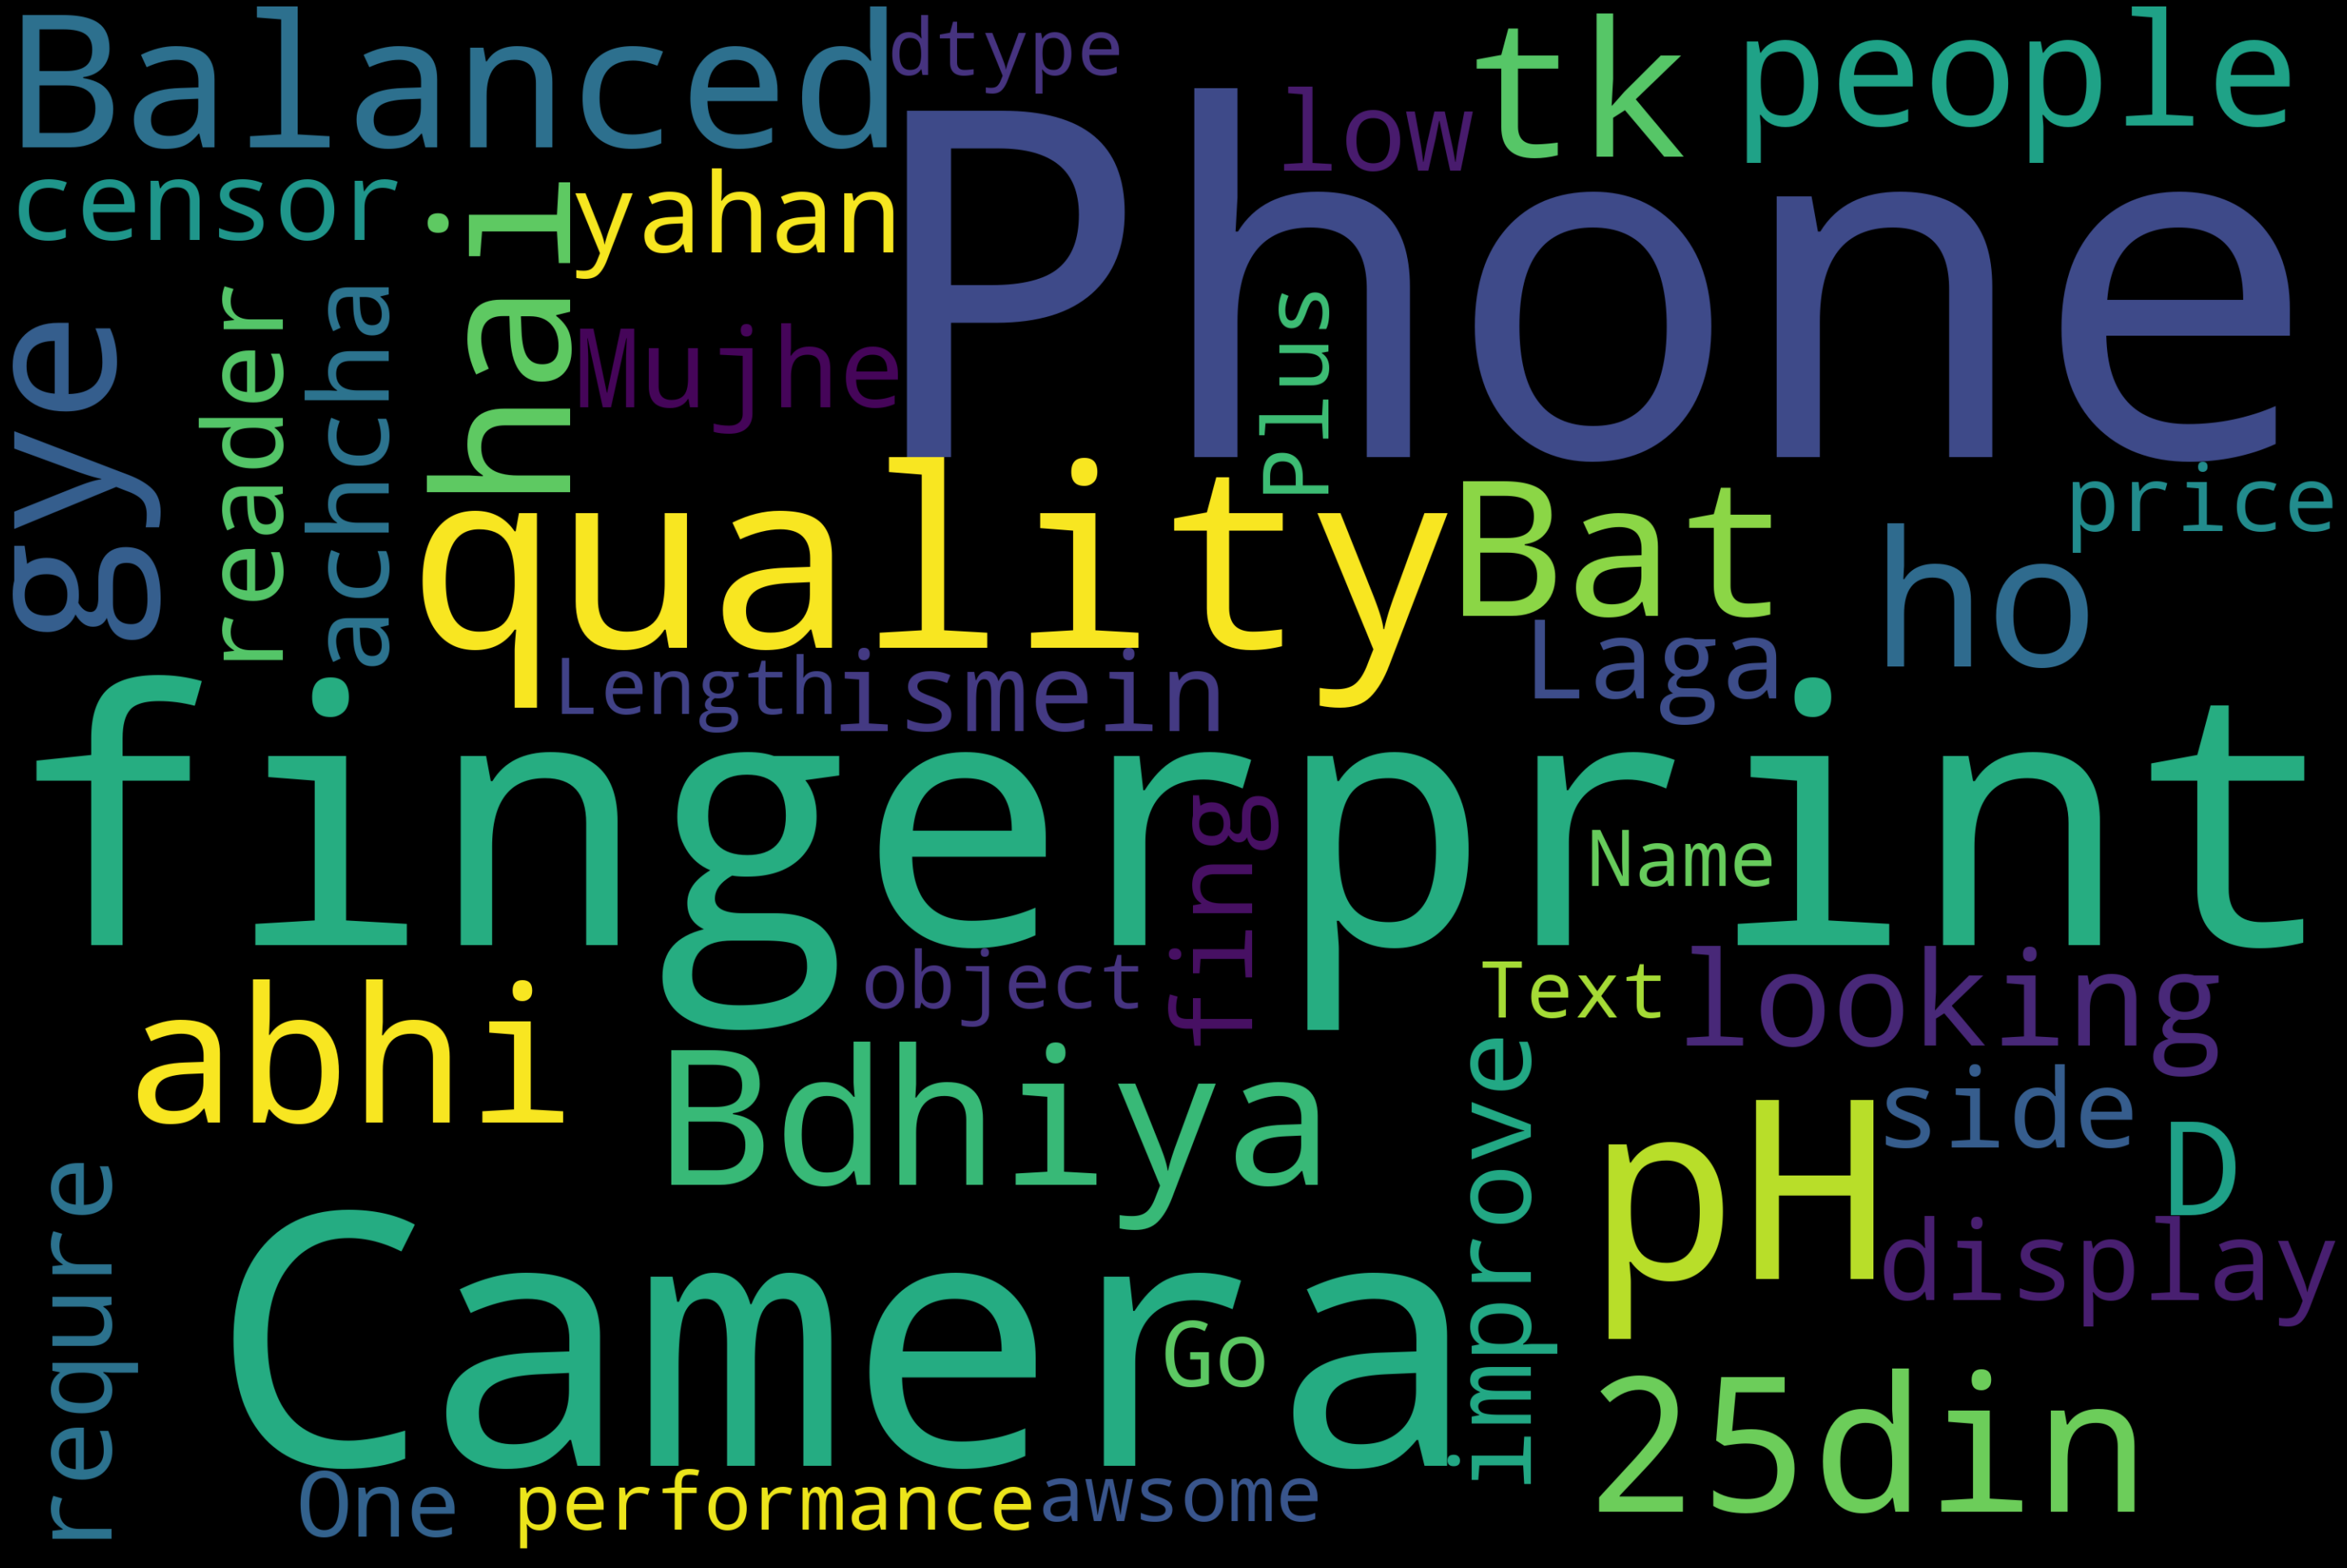

In [34]:
text = review_neu["Text"]
wordcloud = WordCloud(width=3000,height=2000, background_color='black',stopwords=STOPWORDS).generate(str(text))

fig = plt.figure(figsize=(40,30),facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 3.5.3. WordCloud - Negative Reviews

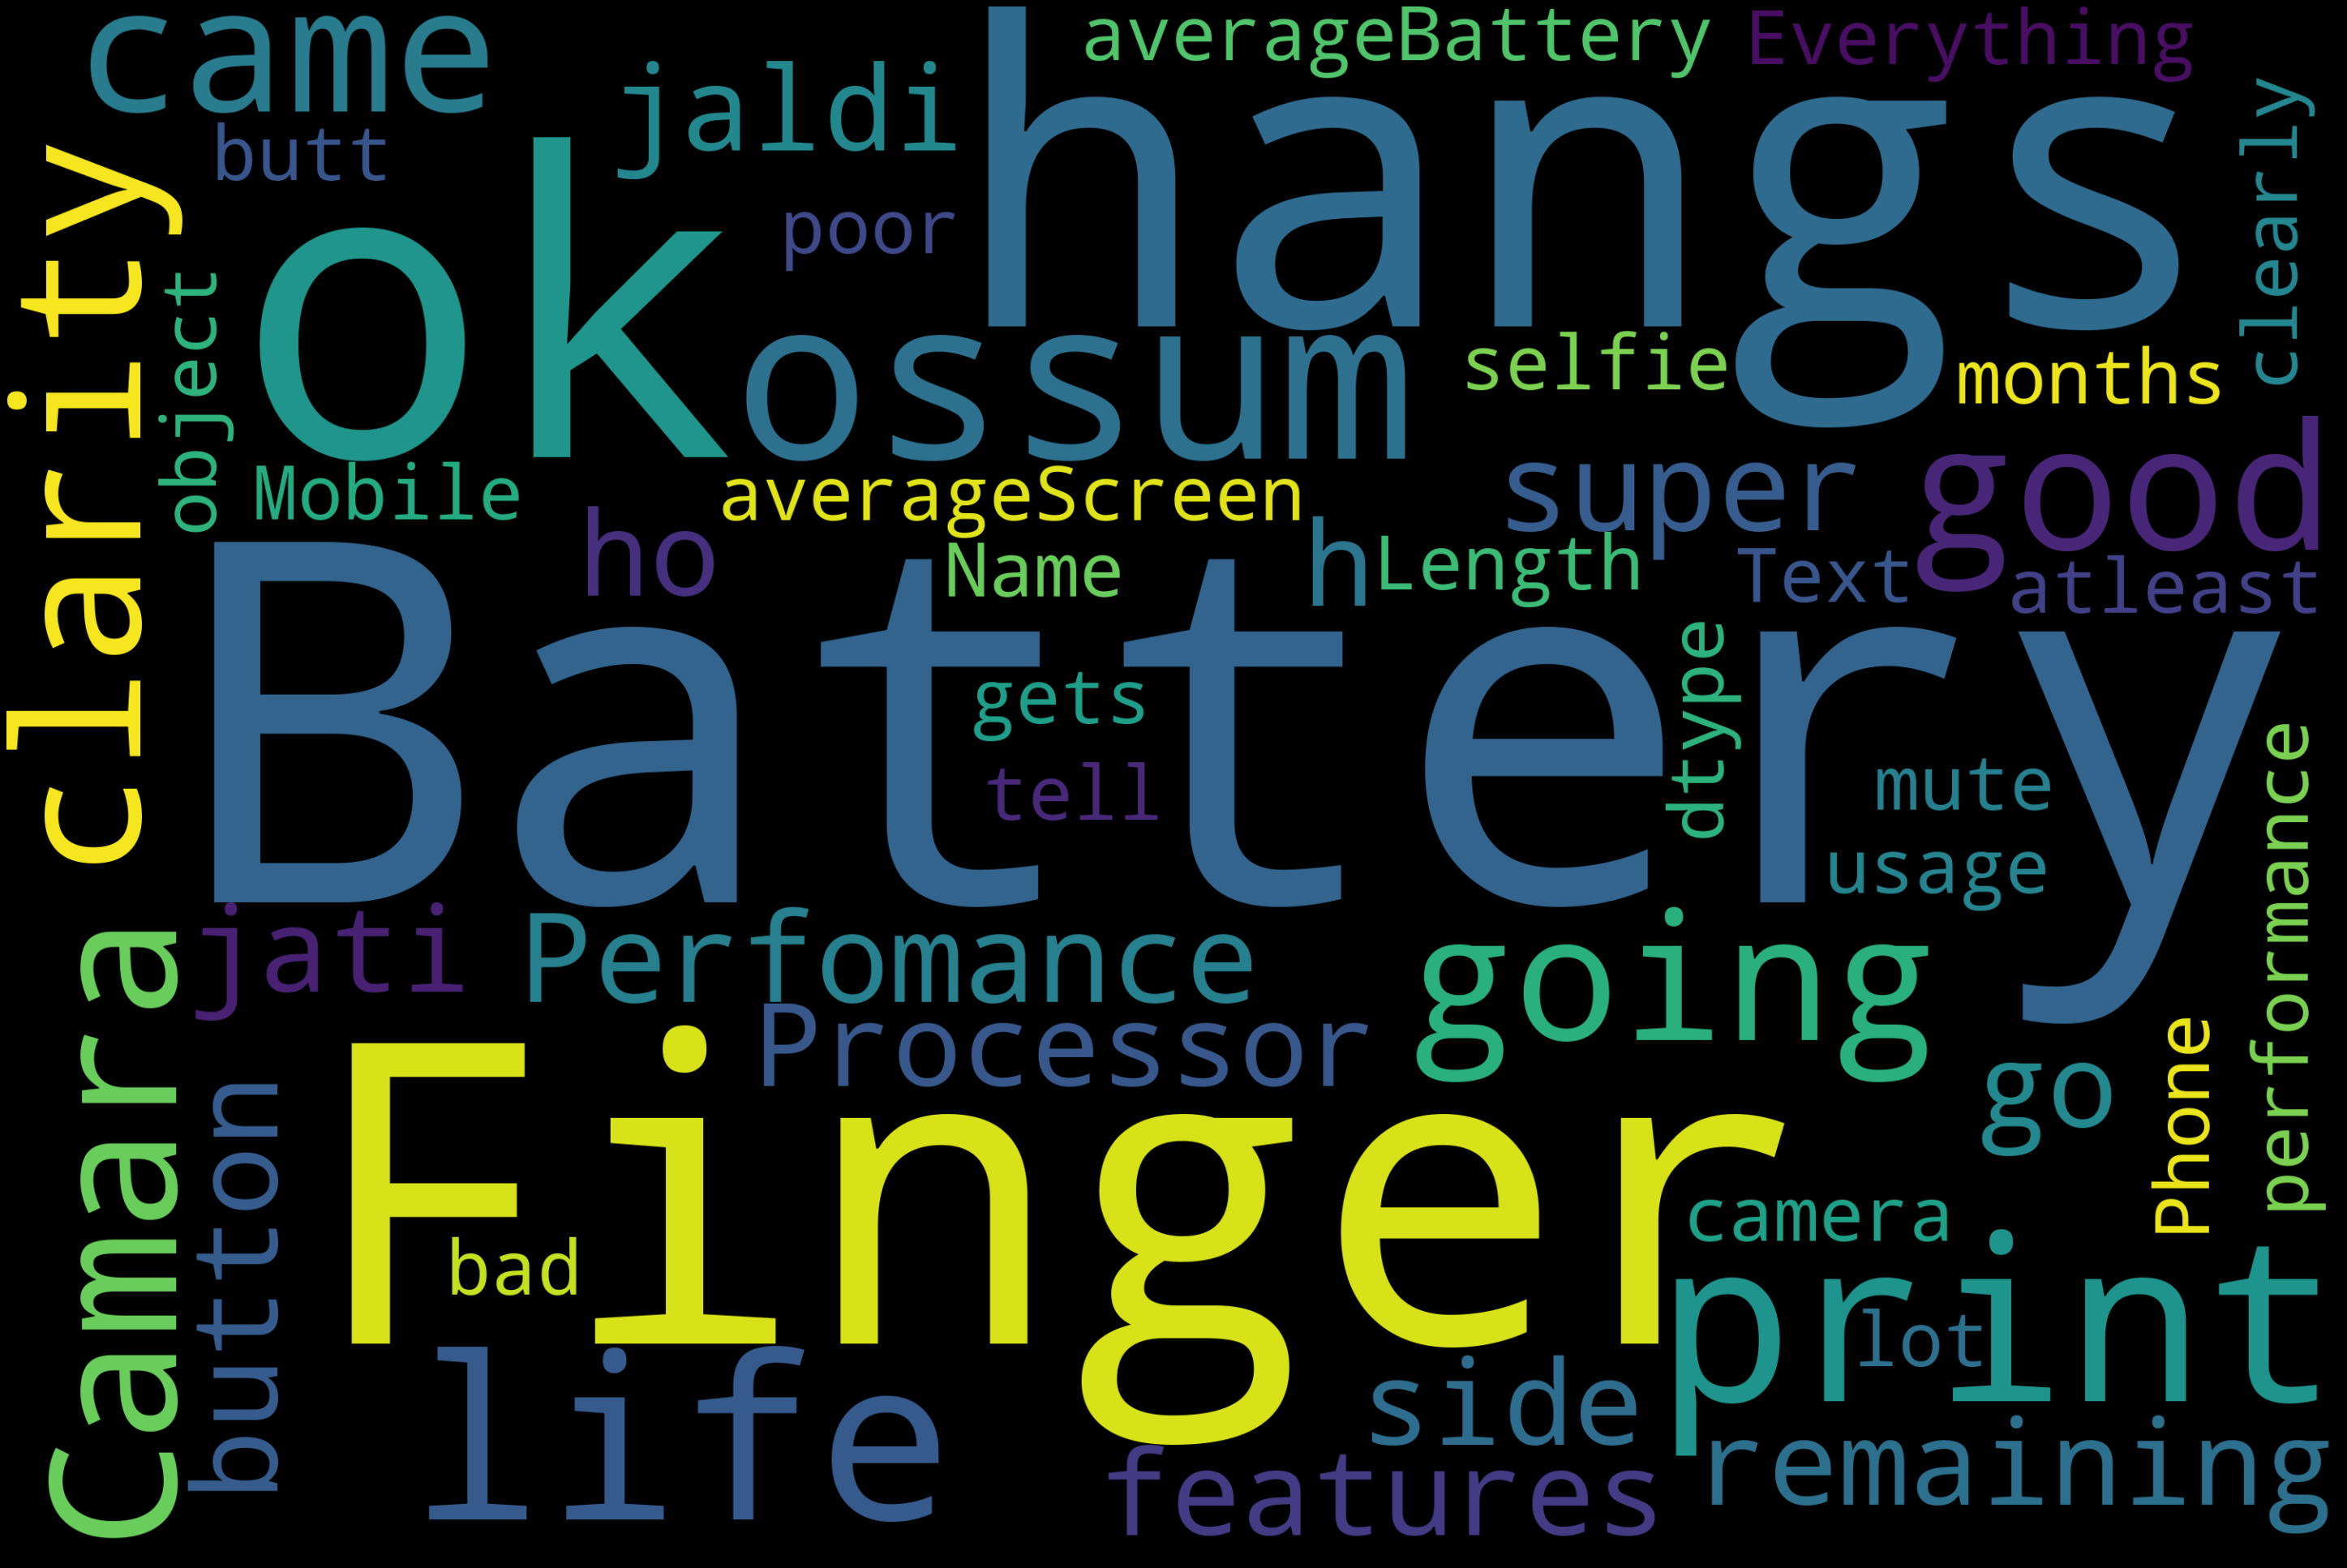

In [35]:
text = review_neg["Text"]
wordcloud = WordCloud(width=3000,height=2000, background_color='black',stopwords=STOPWORDS).generate(str(text))

fig = plt.figure(figsize=(40,30),facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 3.6. Features and Labels Split

In [36]:
# # calling the label encoder function
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in column 'sentiment'
# df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])
# df['Sentiment'].unique()

In [37]:
# Features and Labels
Xfeatures = df['Clean_text']
ylabels = df['Sentiment']

# 3.7. Train-Test Split

In [38]:
# Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [39]:
x_train.shape

(2468,)

In [40]:
x_test.shape

(1058,)

In [41]:
y_train.shape

(2468,)

In [42]:
y_test.shape

(1058,)

# 4. Model Building

## 4.1. Logistic Regression

In [43]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=200,C=1,multi_class='ovr'))])
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr',
                 LogisticRegression(C=1, max_iter=200, multi_class='ovr'))])

In [44]:
pipe_lr_train = pipe_lr.predict(x_train)
print(pd.crosstab(y_train,pipe_lr_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative        170        9        52
Neutral           1      409        10
Positive          9       15      1793


In [45]:
pipe_lr_test=pipe_lr.predict(x_test)
print(pd.crosstab(y_test,pipe_lr_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         41       19        41
Neutral           0      145        17
Positive         14       24       757


In [46]:
accuracy_log_train=accuracy_score(y_train,pipe_lr_train)
accuracy_log_train

0.9611021069692058

In [47]:
accuracy_log_test=accuracy_score(y_test,pipe_lr_test)
accuracy_log_test

0.8913043478260869

In [48]:
print(classification_report(y_test,pipe_lr_test))

              precision    recall  f1-score   support

    Negative       0.75      0.41      0.53       101
     Neutral       0.77      0.90      0.83       162
    Positive       0.93      0.95      0.94       795

    accuracy                           0.89      1058
   macro avg       0.82      0.75      0.76      1058
weighted avg       0.89      0.89      0.88      1058



In [49]:
f1_score_lg = f1_score(y_true=y_test,y_pred = pipe_lr_test,average='macro')
f1_score_lg

0.7648617083399692

In [50]:
recall_lg=recall_score(y_true=y_test,y_pred= pipe_lr_test,average='macro')
print(f"Recall score using Logistic Regression is {recall_lg}")

Recall score using Logistic Regression is 0.7510678601053676


In [51]:
precision_lg=precision_score(y_true=y_test,y_pred=pipe_lr_test,average='macro')
print(f"Precision Score using Logistic Regression is {precision_lg}")

Precision Score using Logistic Regression is 0.815188499009149


## 4.2. Support Vector Machine

In [52]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svm',SVC(gamma=1,C=1,kernel='rbf',decision_function_shape='ovo'))])
pipe_svm.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('svm', SVC(C=1, decision_function_shape='ovo', gamma=1))])

In [53]:
pipe_svm_train = pipe_svm.predict(x_train)
print(pd.crosstab(y_train,pipe_svm_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative        211        2        18
Neutral           0      415         5
Positive          8        0      1809


In [54]:
pipe_svm_test=pipe_svm.predict(x_test)
print(pd.crosstab(y_test,pipe_svm_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative          7        3        91
Neutral           0       85        77
Positive          2        7       786


In [55]:
accuracy_svm_train=accuracy_score(y_train,pipe_svm_train)
accuracy_svm_train

0.9866288492706645

In [56]:
accuracy_svm_test=accuracy_score(y_test,pipe_svm_test)
accuracy_svm_test

0.8298676748582231

In [57]:
print(classification_report(y_test,pipe_svm_test))

              precision    recall  f1-score   support

    Negative       0.78      0.07      0.13       101
     Neutral       0.89      0.52      0.66       162
    Positive       0.82      0.99      0.90       795

    accuracy                           0.83      1058
   macro avg       0.83      0.53      0.56      1058
weighted avg       0.83      0.83      0.79      1058



In [58]:
f1_score_svm = f1_score(y_true=y_test,y_pred = pipe_svm_test,average='macro')
f1_score_svm

0.5625168801293903

In [59]:
recall_svm=recall_score(y_true=y_test,y_pred= pipe_svm_test,average='macro')
print(f"Recall score using Support Vectore Machine is {recall_svm}")

Recall score using Support Vectore Machine is 0.5275591780002599


In [60]:
precision_svm=precision_score(y_true=y_test,y_pred=pipe_svm_test,average='macro')
print(f"Precision Score using Support Vector Machine is {precision_svm}")

Precision Score using Support Vector Machine is 0.8321379969840744


## 4.3. Naive Bayes

In [61]:
pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('mb',MultinomialNB())])
pipe_nb.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('mb', MultinomialNB())])

In [62]:
pipe_nb_train = pipe_nb.predict(x_train)
print(pd.crosstab(y_train,pipe_nb_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         83        1       147
Neutral           0      176       244
Positive          4        8      1805


In [63]:
pipe_nb_test=pipe_nb.predict(x_test)
print(pd.crosstab(y_test,pipe_nb_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative          6        0        95
Neutral           1       33       128
Positive          2        2       791


In [64]:
accuracy_nb_train=accuracy_score(y_train,pipe_nb_train)
accuracy_nb_train

0.8363047001620746

In [65]:
accuracy_nb_test=accuracy_score(y_test,pipe_nb_test)
accuracy_nb_test

0.7844990548204159

In [66]:
print(classification_report(y_test,pipe_nb_test))

              precision    recall  f1-score   support

    Negative       0.67      0.06      0.11       101
     Neutral       0.94      0.20      0.34       162
    Positive       0.78      0.99      0.87       795

    accuracy                           0.78      1058
   macro avg       0.80      0.42      0.44      1058
weighted avg       0.79      0.78      0.72      1058



In [67]:
f1_score_nb = f1_score(y_true=y_test,y_pred = pipe_nb_test,average='macro')
f1_score_nb

0.4395441990512324

In [68]:
recall_nb=recall_score(y_true=y_test,y_pred= pipe_nb_test,average='macro')
print(f"Recall score using Naive Bayes is {recall_nb}")

Recall score using Naive Bayes is 0.4193593992522942


In [69]:
precision_nb=precision_score(y_true=y_test,y_pred=pipe_nb_test,average='macro')
print(f"Precision Score using Naive Bayes is {precision_nb}")

Precision Score using Naive Bayes is 0.7965342349957735


## 4.4. Decision Tree

In [70]:
pipe_dt = Pipeline(steps=[('cv',CountVectorizer()),('dt',DecisionTreeClassifier(class_weight='balanced',
                                criterion='entropy',
                                max_depth=3,
                                min_samples_split=6))])
pipe_dt.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=3,
                                        min_samples_split=6))])

In [71]:
pipe_dt_train = pipe_dt.predict(x_train)
print(pd.crosstab(y_train,pipe_dt_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         51      128        52
Neutral           1      416         3
Positive         14      631      1172


In [72]:
pipe_dt_test=pipe_dt.predict(x_test)
print(pd.crosstab(y_test,pipe_dt_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         14       71        16
Neutral           0      159         3
Positive          7      304       484


In [73]:
accuracy_dt_train=accuracy_score(y_train,pipe_dt_train)
accuracy_dt_train

0.6641004862236629

In [74]:
accuracy_dt_test=accuracy_score(y_test,pipe_dt_test)
accuracy_dt_test

0.6209829867674859

In [75]:
print(classification_report(y_test,pipe_dt_test))

              precision    recall  f1-score   support

    Negative       0.67      0.14      0.23       101
     Neutral       0.30      0.98      0.46       162
    Positive       0.96      0.61      0.75       795

    accuracy                           0.62      1058
   macro avg       0.64      0.58      0.48      1058
weighted avg       0.83      0.62      0.65      1058



In [76]:
f1_score_dt = f1_score(y_true=y_test,y_pred = pipe_dt_test,average='macro')
f1_score_dt

0.47738915343661875

In [77]:
recall_dt=recall_score(y_true=y_test,y_pred= pipe_dt_test,average='macro')
print(f"Recall score using Decision Tree is {recall_dt}")

Recall score using Decision Tree is 0.5763001247713869


In [78]:
precision_dt=precision_score(y_true=y_test,y_pred=pipe_dt_test,average='macro')
print(f"Precision Score using Decision Tree is {precision_dt}")

Precision Score using Decision Tree is 0.6422153719381588


## 4.5. Random Forest

In [79]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(n_estimators=100,
                                 class_weight='balanced',
                                 criterion='entropy',
                                 max_depth=3,
                                 max_samples=0.7,
                                 min_samples_split=6))])
pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=3,
                                        max_samples=0.7,
                                        min_samples_split=6))])

In [80]:
pipe_rf_train = pipe_rf.predict(x_train)
print(pd.crosstab(y_train,pipe_rf_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative        140       43        48
Neutral          29      377        14
Positive         99      330      1388


In [81]:
pipe_rf_test=pipe_rf.predict(x_test)
print(pd.crosstab(y_test,pipe_rf_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         55       29        17
Neutral          15      142         5
Positive         39      154       602


In [82]:
accuracy_rf_train=accuracy_score(y_train,pipe_rf_train)
accuracy_rf_train

0.7718800648298217

In [83]:
accuracy_rf_test=accuracy_score(y_test,pipe_rf_test)
accuracy_rf_test

0.7551984877126654

In [84]:
print(classification_report(y_test,pipe_rf_test))

              precision    recall  f1-score   support

    Negative       0.50      0.54      0.52       101
     Neutral       0.44      0.88      0.58       162
    Positive       0.96      0.76      0.85       795

    accuracy                           0.76      1058
   macro avg       0.64      0.73      0.65      1058
weighted avg       0.84      0.76      0.78      1058



In [85]:
f1_score_rf = f1_score(y_true=y_test,y_pred = pipe_rf_test,average='macro')
f1_score_rf

0.6518188633178367

In [86]:
recall_rf=recall_score(y_true=y_test,y_pred= pipe_rf_test,average='macro')
print(f"Recall score using Random Forest is {recall_rf}")

Recall score using Random Forest is 0.7261101232415346


In [87]:
precision_rf=precision_score(y_true=y_test,y_pred=pipe_rf_test,average='macro')
print(f"Precision Score using Random Forest is {precision_rf}")

Precision Score using Random Forest is 0.6354179408766565


## 4.6. Extra Trees

In [88]:
pipe_et = Pipeline(steps=[('cv',CountVectorizer()),('et',ExtraTreesClassifier( criterion='gini',
                                   max_depth= 6,
                                   max_features= 5,
                                   min_samples_split= 3))])
pipe_et.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('et',
                 ExtraTreesClassifier(max_depth=6, max_features=5,
                                      min_samples_split=3))])

In [89]:
pipe_et_train = pipe_et.predict(x_train)
print(pd.crosstab(y_train,pipe_et_train))

col_0      Positive
Sentiment          
Negative        231
Neutral         420
Positive       1817


In [90]:
pipe_et_test=pipe_et.predict(x_test)
print(pd.crosstab(y_test,pipe_et_test))

col_0      Positive
Sentiment          
Negative        101
Neutral         162
Positive        795


In [91]:
accuracy_et_train=accuracy_score(y_train,pipe_et_train)
accuracy_et_train

0.736223662884927

In [92]:
accuracy_et_test=accuracy_score(y_test,pipe_et_test)
accuracy_et_test

0.7514177693761814

In [93]:
print(classification_report(y_test,pipe_et_test))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       101
     Neutral       0.00      0.00      0.00       162
    Positive       0.75      1.00      0.86       795

    accuracy                           0.75      1058
   macro avg       0.25      0.33      0.29      1058
weighted avg       0.56      0.75      0.64      1058



In [94]:
f1_score_et = f1_score(y_true=y_test,y_pred = pipe_et_test,average='macro')
f1_score_et

0.2860226659471128

In [95]:
recall_et=recall_score(y_true=y_test,y_pred= pipe_et_test,average='macro')
print(f"Recall score using Extra Tree is {recall_et}")

Recall score using Extra Tree is 0.3333333333333333


In [96]:
precision_et=precision_score(y_true=y_test,y_pred=pipe_et_test,average='macro')
print(f"Precision Score using Extra Tree is {precision_et}")

Precision Score using Extra Tree is 0.2504725897920605


## 4.7. KNN

In [97]:
pipe_knn = Pipeline(steps=[('cv',CountVectorizer()),('knn',KNeighborsClassifier(n_neighbors = 1))])
pipe_knn.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [98]:
pipe_knn_train = pipe_knn.predict(x_train)
print(pd.crosstab(y_train,pipe_knn_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative        218        2        11
Neutral           0      416         4
Positive         16        0      1801


In [99]:
pipe_knn_test=pipe_knn.predict(x_test)
print(pd.crosstab(y_test,pipe_knn_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         31       35        35
Neutral           0      137        25
Positive         36       83       676


In [100]:
accuracy_knn_train=accuracy_score(y_train,pipe_knn_train)
accuracy_knn_train

0.9866288492706645

In [101]:
accuracy_knn_test=accuracy_score(y_test,pipe_knn_test)
accuracy_knn_test

0.7977315689981096

In [102]:
print(classification_report(y_test,pipe_knn_test))

              precision    recall  f1-score   support

    Negative       0.46      0.31      0.37       101
     Neutral       0.54      0.85      0.66       162
    Positive       0.92      0.85      0.88       795

    accuracy                           0.80      1058
   macro avg       0.64      0.67      0.64      1058
weighted avg       0.82      0.80      0.80      1058



In [103]:
f1_score_knn = f1_score(y_true=y_test,y_pred = pipe_knn_test,average='macro')
f1_score_knn

0.6364016372979809

In [104]:
recall_knn=recall_score(y_true=y_test,y_pred= pipe_knn_test,average='macro')
print(f"Recall score using KNN is {recall_knn}")

Recall score using KNN is 0.6676413902745969


In [105]:
precision_knn=precision_score(y_true=y_test,y_pred=pipe_knn_test,average='macro')
print(f"Precision Score using KNN is {precision_knn}")

Precision Score using KNN is 0.6394732433315095


## 4.8. Bagging

In [106]:
pipe_bag = Pipeline(steps=[('cv',CountVectorizer()),('bag',BaggingClassifier(n_estimators = 100))])
pipe_bag.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('bag', BaggingClassifier(n_estimators=100))])

In [107]:
pipe_bag_train = pipe_bag.predict(x_train)
print(pd.crosstab(y_train,pipe_bag_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative        219        2        10
Neutral           0      417         3
Positive         12        1      1804


In [108]:
pipe_bag_test=pipe_bag.predict(x_test)
print(pd.crosstab(y_test,pipe_bag_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         54       16        31
Neutral           0      149        13
Positive         22       28       745


In [109]:
accuracy_bag_train=accuracy_score(y_train,pipe_bag_train)
accuracy_bag_train

0.9886547811993517

In [110]:
accuracy_bag_test=accuracy_score(y_test,pipe_bag_test)
accuracy_bag_test

0.8960302457466919

In [111]:
print(classification_report(y_test,pipe_bag_test))

              precision    recall  f1-score   support

    Negative       0.71      0.53      0.61       101
     Neutral       0.77      0.92      0.84       162
    Positive       0.94      0.94      0.94       795

    accuracy                           0.90      1058
   macro avg       0.81      0.80      0.80      1058
weighted avg       0.90      0.90      0.89      1058



In [112]:
f1_score_bag = f1_score(y_true=y_test,y_pred = pipe_bag_test,average='macro')
f1_score_bag

0.7967542256334331

In [113]:
recall_bag=recall_score(y_true=y_test,y_pred= pipe_bag_test,average='macro')
print(f"Recall score using Bagging is {recall_bag}")

Recall score using Bagging is 0.7971711566684272


In [114]:
precision_bag=precision_score(y_true=y_test,y_pred=pipe_bag_test,average='macro')
print(f"Precision Score using Bagging is {precision_bag}")

Precision Score using Bagging is 0.8089267492562319


## 4.9. Adaboost

In [115]:
pipe_ada = Pipeline(steps=[('cv',CountVectorizer()),('ada',AdaBoostClassifier(n_estimators = 100,learning_rate=0.8))])
pipe_ada.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('ada',
                 AdaBoostClassifier(learning_rate=0.8, n_estimators=100))])

In [116]:
pipe_ada_train = pipe_ada.predict(x_train)
print(pd.crosstab(y_train,pipe_ada_train))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         94        1       136
Neutral           1      393        26
Positive        160      150      1507


In [117]:
pipe_ada_test=pipe_ada.predict(x_test)
print(pd.crosstab(y_test,pipe_ada_test))

col_0      Negative  Neutral  Positive
Sentiment                             
Negative         24       13        64
Neutral           1      147        14
Positive         57       66       672


In [118]:
accuracy_ada_train=accuracy_score(y_train,pipe_ada_train)
accuracy_ada_train

0.8079416531604539

In [119]:
accuracy_ada_test=accuracy_score(y_test,pipe_ada_test)
accuracy_ada_test

0.7967863894139886

In [120]:
print(classification_report(y_test,pipe_ada_test))

              precision    recall  f1-score   support

    Negative       0.29      0.24      0.26       101
     Neutral       0.65      0.91      0.76       162
    Positive       0.90      0.85      0.87       795

    accuracy                           0.80      1058
   macro avg       0.61      0.66      0.63      1058
weighted avg       0.80      0.80      0.79      1058



In [121]:
f1_score_ada = f1_score(y_true=y_test,y_pred = pipe_ada_test,average='macro')
f1_score_ada

0.6299766511171528

In [122]:
recall_ada=recall_score(y_true=y_test,y_pred= pipe_ada_test,average='macro')
print(f"Recall score using Adaboost is {recall_ada}")

Recall score using Adaboost is 0.6634380628838565


In [123]:
precision_ada=precision_score(y_true=y_test,y_pred=pipe_ada_test,average='macro')
print(f"Precision Score using Adaboost is {precision_ada}")

Precision Score using Adaboost is 0.6130418015684582


# 5. Model Comparison

In [124]:
model_accuracy={'Model':pd.Series(['Logistic Regression','SVM','Naive Bayes','Decision Tree','Random Forest','Extra Trees','KNN','Bagging','Adaboost']),
                'Train Accuracy':pd.Series([accuracy_log_train,accuracy_svm_train,accuracy_nb_train,accuracy_dt_train,accuracy_rf_train,accuracy_et_train,accuracy_knn_train,accuracy_bag_train,accuracy_ada_train]),
               'Test Accuracy':pd.Series([accuracy_log_test,accuracy_svm_test,accuracy_nb_test,accuracy_dt_test,accuracy_rf_test,accuracy_et_test,accuracy_knn_test,accuracy_bag_test,accuracy_ada_test]),
               'F1 Score':pd.Series([f1_score_lg,f1_score_svm,f1_score_nb,f1_score_dt,f1_score_rf,f1_score_et,f1_score_knn,f1_score_bag,f1_score_ada]),
               'Precision':pd.Series([precision_lg,precision_svm,precision_nb,precision_dt,precision_rf,precision_et,precision_knn,precision_bag,precision_ada]),
               'Recall Score':pd.Series([recall_lg,recall_svm,recall_nb,recall_dt,recall_rf,recall_et,recall_knn,recall_bag,recall_ada])}

metrics_table=pd.DataFrame(model_accuracy)
metrics_table.sort_values(['F1 Score'],ascending=False)

Model  Train Accuracy  Test Accuracy  F1 Score  Precision  \
7              Bagging        0.988655       0.896030  0.796754   0.808927   
0  Logistic Regression        0.961102       0.891304  0.764862   0.815188   
4        Random Forest        0.771880       0.755198  0.651819   0.635418   
6                  KNN        0.986629       0.797732  0.636402   0.639473   
8             Adaboost        0.807942       0.796786  0.629977   0.613042   
1                  SVM        0.986629       0.829868  0.562517   0.832138   
3        Decision Tree        0.664100       0.620983  0.477389   0.642215   
2          Naive Bayes        0.836305       0.784499  0.439544   0.796534   
5          Extra Trees        0.736224       0.751418  0.286023   0.250473   

   Recall Score  
7      0.797171  
0      0.751068  
4      0.726110  
6      0.667641  
8      0.663438  
1      0.527559  
3      0.576300  
2      0.419359  
5      0.333333

# 6. Deployment

In [125]:
# Save Model and Pipepline
import joblib
pipeline_file = open("emotion.pkl","wb")
joblib.dump(pipe_bag,pipeline_file)
pipeline_file.close()

In [ ]:
!streamlit run app.py